## Visualizing n random or representative cell in a given well
- Inputs are:
    -  **file_name** - .sql file path for the target plate(or a dataframe)
    -  **well_name** - Well name
    -  **n_cells** - number of single cells you want to visualize
    -  **box_size** - size of box in pixels for cropping a cell
    -  **channels** - list of channels you want to plot
    -  **cell_selection_method** - can be one of the following methods
        - random - generate n randomly selected cells
        - representative - clusters the data and sample from the "closest to mean cluster"
        - geometric_median - plots single sample than is the geometric median of samples
        
        
#### Steps:

- Reading the target well from the input plate 
- Sampling using cell_selection_method 
  

In [33]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# from utils import read_data, visualize_data
from utils.read_data import *
from utils.visualize_data import *
from sklearn.cluster import KMeans
import time
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Inputs

In [6]:
file_name='/Users/rdijk/Documents/Data/RawData/Stain2/RawData/BR00112197binned.sqlite'

well_names = ['M08'] #["B20", "E24", "M08"] # list of wells to retrieve
compounds = ['purmorphamine'] # ['GW-3965'] ['skepinone-l', 'sirolimus', 'purmorphamine']
plate_name = 'BR00112197binned' #  '200922_015124-V' 
channels=["Mito","AGP","DNA","RNA","ER"]

### Read single cell data

In [7]:
path = '/Users/rdijk/Library/DBeaverData/workspace6/Feature Aggregation/Scripts/Scripts/'
#query_file = path + 'GetSingleCellImageData_quick.sql'
query_file = path + 'GetSingleCellImageData_full.sql'

f = open(query_file, 'r')
sql_lines = f.readlines()
f.close()

#sql_lines[-1] = sql_lines[-1].replace('()', f'("{well_names[0]}", "{well_names[1]}", "{well_names[2]}")')
sql_lines[-1] = sql_lines[-1].replace('()', f'("{well_names[0]}")')

print(sql_lines[-1])
new_query_name = 'GetSingleCellImageData_newQ'
f = open(query_file.replace(query_file.split('/')[-1].split('.sql')[0], new_query_name), 'w')
f.writelines(sql_lines)
f.close()

query_file = f'/Users/rdijk/Library/DBeaverData/workspace6/Feature Aggregation/Scripts/Scripts/{new_query_name}.sql'

WHERE Image.well IN ("M08")


In [8]:
%%time
df_p_s0 = readSingleCellData_sql_CustomFile(file_name, query_file)

time elapsed: 7.074431852499644  mins
CPU times: user 6min 11s, sys: 13 s, total: 6min 24s
Wall time: 7min 4s


In [9]:
# Load saliencies 
dirpath = '/Users/rdijk/Documents/ProjectFA/Jupyter scripts/Saliencies'
df_list = []
for i in range(len(well_names)):
    df_s = pd.read_csv(os.path.join(dirpath, f'saliencies_{plate_name}_{well_names[i]}_{compounds[i]}.csv'))
    df_s['well_position'] = [well_names[i]]*len(df_s)
    print(len(df_s))
    df_list.append(df_s)
df_saliencies = pd.concat(df_list)
df_saliencies                                  

3147


Unnamed: 0  SaliencyV0  SaliencyV1  SaliencyV2  SaliencyV4  \
0              0    0.050885    0.460037    0.087359    0.510923   
1              1    0.037153    0.333779    0.040300    0.370932   
2              2    0.035217    0.399317    0.232660    0.434534   
3              3    0.045163    0.463812    0.246564    0.508975   
4              4    0.019078    0.221700    0.413368    0.240778   
...          ...         ...         ...         ...         ...   
3142        3142    0.089773    0.856384    0.492663    0.946157   
3143        3143    0.064808    0.396951    0.182910    0.461759   
3144        3144    0.090000    0.478729    0.188735    0.568729   
3145        3145    0.080384    0.164455    0.068746    0.244839   
3146        3146    0.068778    0.547392    0.556265    0.616170   

                                              TopYfeats well_position  
0     Cytoplasm.Cytoplasm_Correlation_RWC_DNA_AGP,Nu...           M08  
1     Nuclei.Nuclei_RadialDistribution_RadialCV_DNA_...           M08  
2     Cytoplasm.Cytoplasm_Correlation_RWC_DNA_AGP,Nu...           M08  
3     Cytoplasm.Cytoplasm_Correlation_RWC_DNA_ER,Nuc...           M08  
4     Nuclei.Nuclei_RadialDistribution_RadialCV_DNA_...           M08  
...                                                 ...           ...  
3142  Cytoplasm.Cytoplasm_Correlation_RWC_DNA_ER,Nuc...           M08  
3143  Cytoplasm.Cytoplasm_Correlation_RWC_DNA_AGP,Nu...           M08  
3144  Cytoplasm.Cytoplasm_Correlation_RWC_DNA_ER,Nuc...           M08  
3145  Nuclei.Nuclei_Granularity_5_DNA,Nuclei.Nuclei_...           M08  
3146  Cytoplasm.Cytoplasm_Correlation_RWC_DNA_AGP,Nu...           M08  

[3147 rows x 7 columns]

In [10]:
df_p_s0

well_position            broad_sample     pert_iname pert_type  \
0              M08  BRD-K73397362-001-06-6  purmorphamine       trt   
1              M08  BRD-K73397362-001-06-6  purmorphamine       trt   
2              M08  BRD-K73397362-001-06-6  purmorphamine       trt   
3              M08  BRD-K73397362-001-06-6  purmorphamine       trt   
4              M08  BRD-K73397362-001-06-6  purmorphamine       trt   
...            ...                     ...            ...       ...   
3142           M08  BRD-K73397362-001-06-6  purmorphamine       trt   
3143           M08  BRD-K73397362-001-06-6  purmorphamine       trt   
3144           M08  BRD-K73397362-001-06-6  purmorphamine       trt   
3145           M08  BRD-K73397362-001-06-6  purmorphamine       trt   
3146           M08  BRD-K73397362-001-06-6  purmorphamine       trt   

     control_type                          moa  \
0                  smoothened receptor agonist   
1                  smoothened receptor agonist   
2                  smoothened receptor agonist   
3                  smoothened receptor agonist   
4                  smoothened receptor agonist   
...           ...                          ...   
3142               smoothened receptor agonist   
3143               smoothened receptor agonist   
3144               smoothened receptor agonist   
3145               smoothened receptor agonist   
3146               smoothened receptor agonist   

                                  PathName_CellOutlines  \
0     /home/ubuntu/local_output/BR00112197/analysis/...   
1     /home/ubuntu/local_output/BR00112197/analysis/...   
2     /home/ubuntu/local_output/BR00112197/analysis/...   
3     /home/ubuntu/local_output/BR00112197/analysis/...   
4     /home/ubuntu/local_output/BR00112197/analysis/...   
...                                                 ...   
3142  /home/ubuntu/local_output/BR00112197/analysis/...   
3143  /home/ubuntu/local_output/BR00112197/analysis/...   
3144  /home/ubuntu/local_output/BR00112197/analysis/...   
3145  /home/ubuntu/local_output/BR00112197/analysis/...   
3146  /home/ubuntu/local_output/BR00112197/analysis/...   

                                      PathName_IllumAGP  \
0     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
1     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
2     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
3     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
4     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
...                                                 ...   
3142  /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
3143  /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
3144  /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
3145  /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
3146  /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   

                              PathName_IllumBrightfield  \
0     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
1     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
2     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
3     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
4     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
...                                                 ...   
3142  /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
3143  /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
3144  /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
3145  /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   
3146  /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...   

                                      PathName_IllumDNA  ...  \
0     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...  ...   
1     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...  ...   
2     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...  ...   
3     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...  ...   
4     /home/ubuntu/bucket/projects/2019_07_11_JUMP-C...  ...   
...                                     

In [11]:
with open(f'/Users/rdijk/PycharmProjects/featureAggregation/datasets/Stain2/DataLoader_BR00112197binned_FS/{well_names[0]}.pkl', 'rb') as f:
            sample1 = pickle.load(f)
temp = sample1['cell_features'].reset_index(drop=True)
na_free = temp.dropna()
only_na = temp[~temp.index.isin(na_free.index)]
dropped_indices = list(only_na.index.values)
dropped_indices

[]

### Visualize

In [12]:
df_saliencies

Unnamed: 0  SaliencyV0  SaliencyV1  SaliencyV2  SaliencyV4  \
0              0    0.050885    0.460037    0.087359    0.510923   
1              1    0.037153    0.333779    0.040300    0.370932   
2              2    0.035217    0.399317    0.232660    0.434534   
3              3    0.045163    0.463812    0.246564    0.508975   
4              4    0.019078    0.221700    0.413368    0.240778   
...          ...         ...         ...         ...         ...   
3142        3142    0.089773    0.856384    0.492663    0.946157   
3143        3143    0.064808    0.396951    0.182910    0.461759   
3144        3144    0.090000    0.478729    0.188735    0.568729   
3145        3145    0.080384    0.164455    0.068746    0.244839   
3146        3146    0.068778    0.547392    0.556265    0.616170   

                                              TopYfeats well_position  
0     Cytoplasm.Cytoplasm_Correlation_RWC_DNA_AGP,Nu...           M08  
1     Nuclei.Nuclei_RadialDistribution_RadialCV_DNA_...           M08  
2     Cytoplasm.Cytoplasm_Correlation_RWC_DNA_AGP,Nu...           M08  
3     Cytoplasm.Cytoplasm_Correlation_RWC_DNA_ER,Nuc...           M08  
4     Nuclei.Nuclei_RadialDistribution_RadialCV_DNA_...           M08  
...                                                 ...           ...  
3142  Cytoplasm.Cytoplasm_Correlation_RWC_DNA_ER,Nuc...           M08  
3143  Cytoplasm.Cytoplasm_Correlation_RWC_DNA_AGP,Nu...           M08  
3144  Cytoplasm.Cytoplasm_Correlation_RWC_DNA_ER,Nuc...           M08  
3145  Nuclei.Nuclei_Granularity_5_DNA,Nuclei.Nuclei_...           M08  
3146  Cytoplasm.Cytoplasm_Correlation_RWC_DNA_AGP,Nu...           M08  

[3147 rows x 7 columns]

In [13]:
df_p_s=df_p_s0.drop(dropped_indices, axis=0).reset_index(drop=True).copy()
df_saliencies['SaliencyV1']=(df_saliencies['SaliencyV1']-df_saliencies['SaliencyV1'].min())/(df_saliencies['SaliencyV1'].max()-df_saliencies['SaliencyV1'].min())
df_saliencies['SaliencyV0']=(df_saliencies['SaliencyV0']-df_saliencies['SaliencyV0'].min())/(df_saliencies['SaliencyV0'].max()-df_saliencies['SaliencyV0'].min())
df_p_s=pd.concat([df_p_s.reset_index(drop=True), df_saliencies.reset_index(drop=True)], axis=1)

images_dir="/Users/rdijk/Documents/Data/RawData/Stain2/RawData/GetImages/BR00112197binned_Images/"

for ch in channels:
    df_p_s["PathName_Orig"+ch]=images_dir+"images/"+df_p_s["Metadata_Plate"].astype(str)
    #df_p_s["FileName_Orig"+ch]=df_p_s["FileName_Orig"+ch].apply(lambda x: x.replace("tiff","png))    

In [14]:
df_p_s.shape

(3147, 1361)

In [18]:
df_saliencies.head()

Unnamed: 0  SaliencyV0  SaliencyV1  SaliencyV2  SaliencyV4  \
0           0    0.050885    0.460037    0.087359    0.510923   
1           1    0.037153    0.333779    0.040300    0.370932   
2           2    0.035217    0.399317    0.232660    0.434534   
3           3    0.045163    0.463812    0.246564    0.508975   
4           4    0.019078    0.221700    0.413368    0.240778   

                                           TopYfeats well_position  
0  Cytoplasm.Cytoplasm_Correlation_RWC_DNA_AGP,Nu...           M08  
1  Nuclei.Nuclei_RadialDistribution_RadialCV_DNA_...           M08  
2  Cytoplasm.Cytoplasm_Correlation_RWC_DNA_AGP,Nu...           M08  
3  Cytoplasm.Cytoplasm_Correlation_RWC_DNA_ER,Nuc...           M08  
4  Nuclei.Nuclei_RadialDistribution_RadialCV_DNA_...           M08

(870, 1361)


<IPython.core.display.Javascript object>


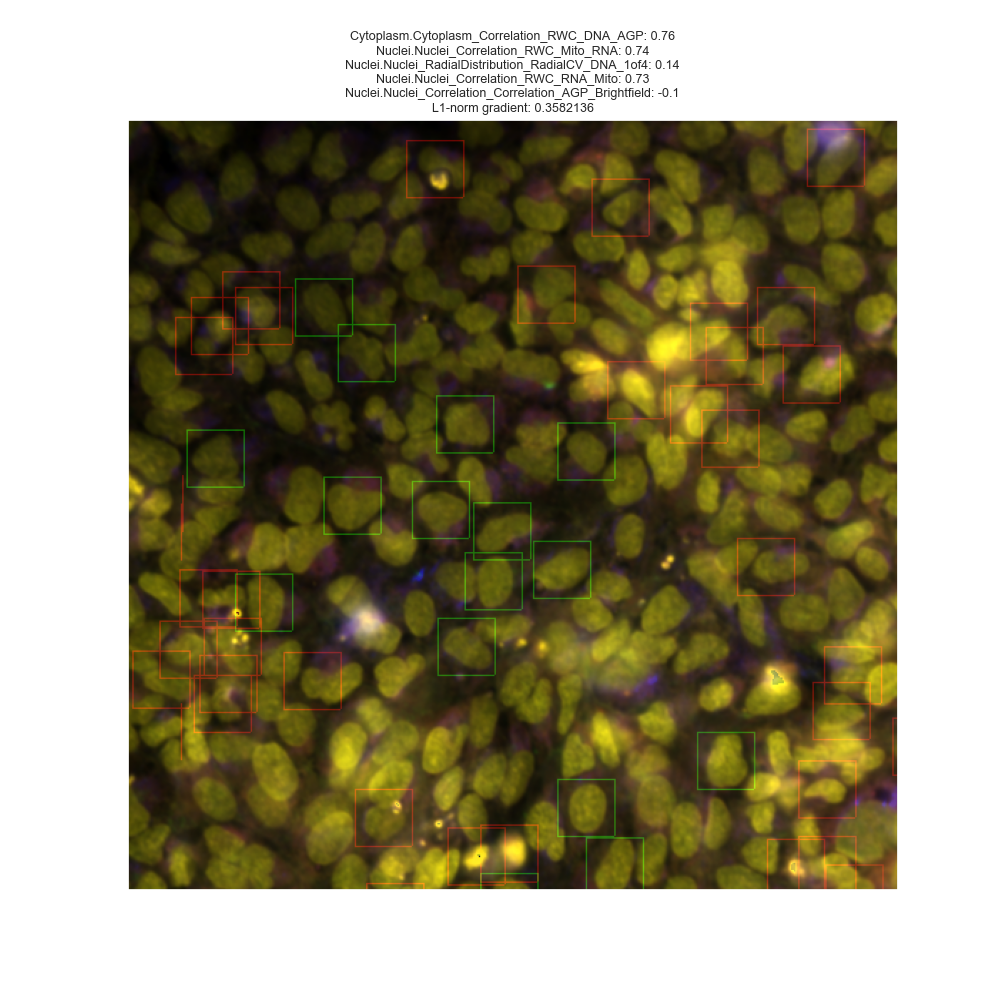

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# how we select cells which can be 'random','representative','geometric_median', 'saliencyVx', 'one_image'
cell_selection_method='one_image' # capital 'S' for Saliency's
imnumb = 1
n_cells=20 # needs to be divisible by 2
box_size=100

show_single_image = True
if show_single_image:
    box_size=40
    df_samples, cp_features_analysis = extract_single_cell_samples(df_p_s, n_cells, cell_selection_method, imnumb)
    image = visualize_full_image(channels,df_samples,box_size,title=cell_selection_method,compressed=False,
                           compressed_im_size=1080, show_rgb=True, cell_selection_method='SaliencyV4');
else:
    df_samples, cp_features_analysis = extract_single_cell_samples(df_p_s, n_cells, cell_selection_method)
    visualize_n_SingleCell(channels,df_samples,box_size,title=cell_selection_method,compressed=True,
                           compressed_im_size=1080, show_rgb=True, cell_selection_method=cell_selection_method);


# Feature analysis

In [ ]:
X = 20
all_salient_features = pd.read_csv(dirpath+f'/feature_saliencies_{plate_name}_{well_names[0]}_{compounds[0]}.csv')
most_salient_features = all_salient_features.iloc[:X]
most_salient_features

In [ ]:
N=100 # needs to be divisible by 2
    
SAMPLES, _ = extract_single_cell_samples(df_p_s, N, cell_selection_method)


fig, ax = plt.subplots(n_cells//2, 2, figsize=(10,20))
for (idx, row), ax in zip(most_salient_features.iterrows(), ax.ravel()):
    print(row['FeatureNames'])
    most_salient_cells = SAMPLES.loc[:(N//2)-1, row['FeatureNames'].split('.')[-1]]
    least_salient_cells = SAMPLES.loc[N//2:, row['FeatureNames'].split('.')[-1]]
    
    ax.hist([most_salient_cells, least_salient_cells], label=['most salient cells', 'least salient cells'])
    ax.set_title( row['FeatureNames'].split('.')[-1])
    ax.legend()

fig.subplots_adjust(hspace=0.5)


In [ ]:
import seaborn as sns
# Correlation most salient features
adj_names = [x.split('.')[-1] for x in most_salient_features.FeatureNames.values]
most_salient_cells = SAMPLES.loc[:(N//2)-1, adj_names] # loc is inclusive for slice indexing
least_salient_cells = SAMPLES.loc[N//2:, adj_names]

corr_most = most_salient_cells.corr()
corr_least = least_salient_cells.corr()

# plot the heatmap
sns.clustermap(corr_most, 
        xticklabels=corr_most.columns,
        yticklabels=corr_most.columns)

# plot the heatmap
sns.clustermap(corr_least, 
        xticklabels=corr_least.columns,
        yticklabels=corr_least.columns)


In [ ]:
# Calculate covariances
adj_names = [x.split('.')[-1] for x in most_salient_features.FeatureNames.values]
most_salient_cells = SAMPLES.iloc[:N//2, 30:-8] 
least_salient_cells = SAMPLES.iloc[N//2:, 30:-8]

most_salient_cells =(most_salient_cells-most_salient_cells.min())/(most_salient_cells.max()-most_salient_cells.min())
least_salient_cells =(least_salient_cells-least_salient_cells.min())/(least_salient_cells.max()-least_salient_cells.min())
most_salient_cells = most_salient_cells.fillna(0)
least_salient_cells = least_salient_cells.fillna(0)



cov_most = np.cov(most_salient_cells, rowvar=False) 
cov_least = np.cov(least_salient_cells, rowvar=False)

# Add saliency overlay 
# temp_df = pd.DataFrame({'FeatureNames': [x.split('_')[0]+'.'+x for x in most_salient_cells.columns]})
# a = pd.merge(temp_df, all_salient_features, on="FeatureNames", how='left')
# sal =(a.Saliency-a.Saliency.min())/(a.Saliency.max()-a.Saliency.min())
# cov_most = np.multiply(cov_most, sal.values[:, np.newaxis])
# cov_least = np.multiply(cov_least, sal.values[:, np.newaxis])

# plot the heatmap
sns.clustermap(cov_most, vmin=-0.05, vmax=0.05)

# plot the heatmap
sns.clustermap(cov_least, vmin=-0.05, vmax=0.05)
